In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
housing = fetch_california_housing(as_frame=True)
housing = housing.frame
housing.head()
# print(housing.shape)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


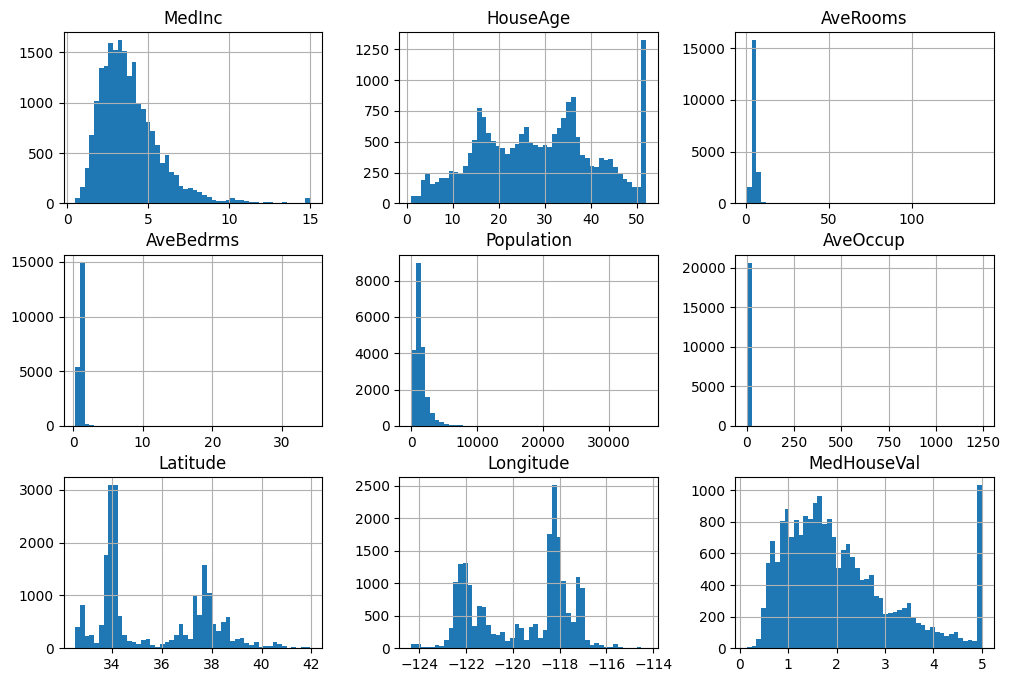

In [ ]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

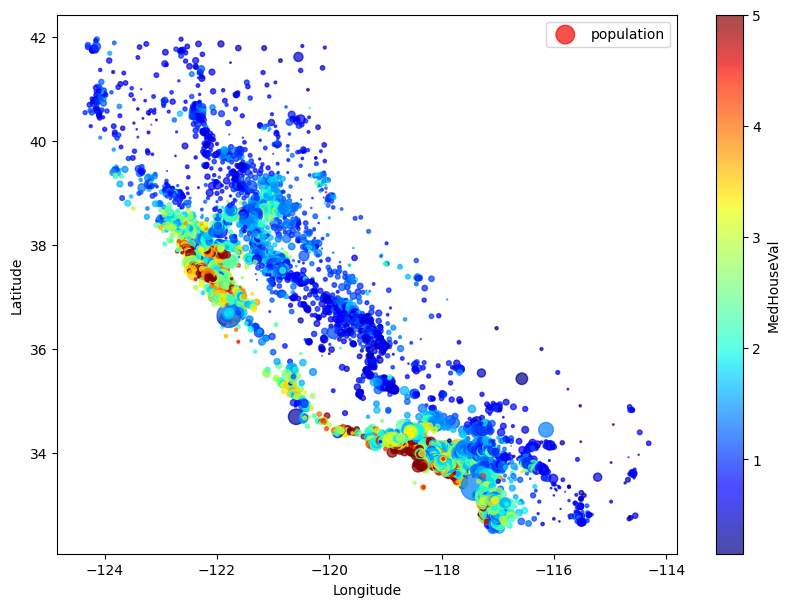

In [16]:
housing.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=housing['Population']/100, label="population", alpha=0.7)
plt.show()

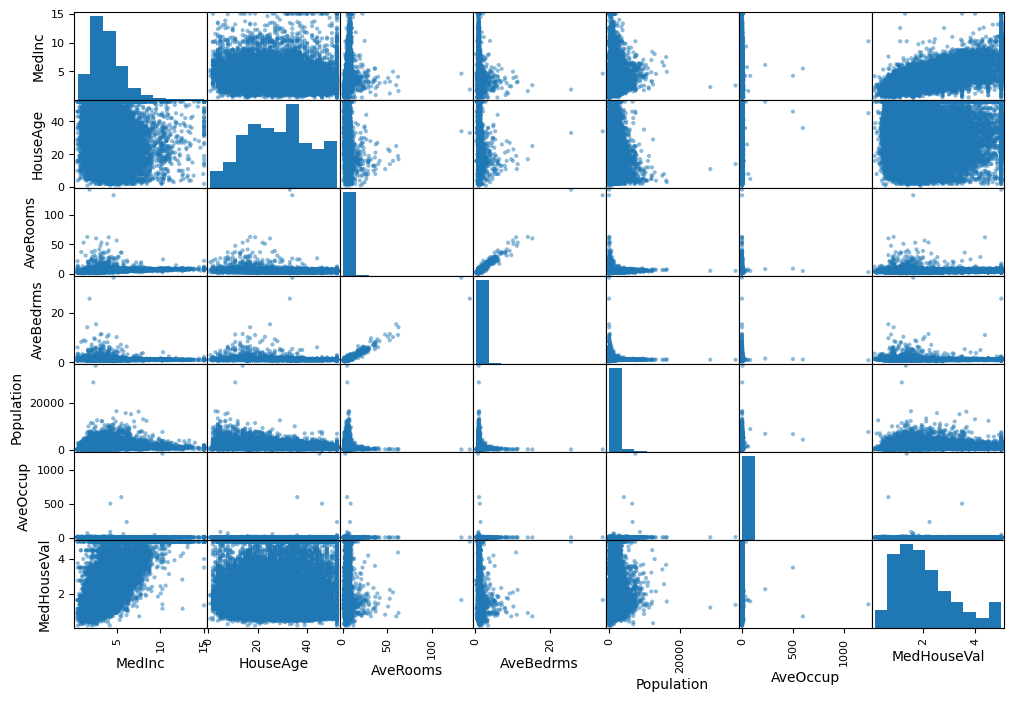

In [18]:
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

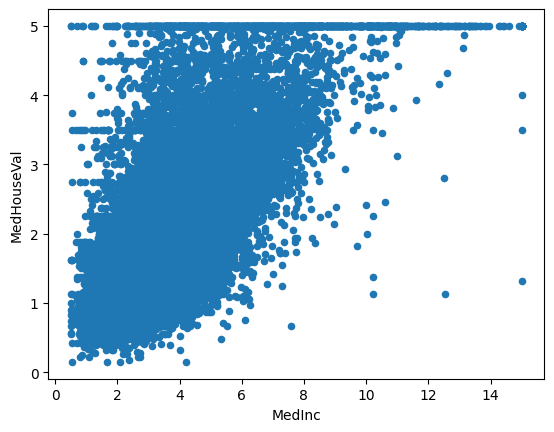

In [ ]:
housing.plot(kind="scatter", x="MedInc",y="MedHouseVal")

In [19]:
corr = housing.corr()
corr['MedHouseVal'].sort_values(ascending=True)

,MedHouseVal
Latitude,-0.144160
AveBedrms,-0.046701
Longitude,-0.045967
Population,-0.024650
AveOccup,-0.023737
HouseAge,0.105623
AveRooms,0.151948
MedInc,0.688075
MedHouseVal,1.000000


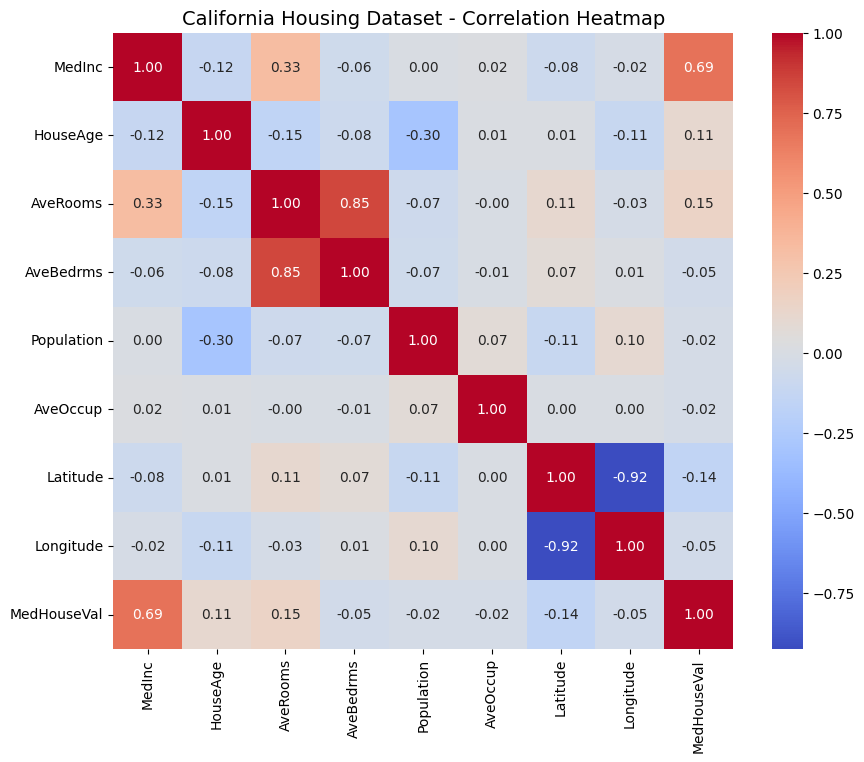

In [22]:
# Heatmap chizish
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("California Housing Dataset - Correlation Heatmap", fontsize=14)
plt.show()

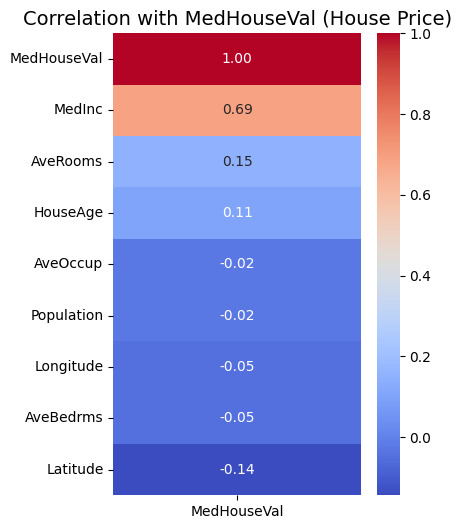

In [23]:
# Korelatsiya matritsasidan faqat MedHouseVal bilan bog'liq ustunni olish
corr_with_target = housing.corr()[['MedHouseVal']].sort_values(by='MedHouseVal', ascending=False)

# Heatmap chizish
plt.figure(figsize=(4,6))
sns.heatmap(corr_with_target, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation with MedHouseVal (House Price)", fontsize=14)
plt.show()

In [25]:
housing.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [26]:
housing.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [27]:
X = housing.iloc[:,:-1]
y = housing.iloc[:,-1]

In [28]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (20640, 8)
y shape: (20640,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [35]:
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [38]:
y_pred = regression_pipeline.predict(X_test)

In [40]:
r2_score(y_test, y_pred)

0.575787706032451

In [42]:
# MSE va MAE hisoblash
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.5558915986952442
Mean Absolute Error (MAE): 0.5332001304956565
